In [1]:
import os
for dirname, _, filenames in os.walk('D://PBL-Plant-Health-Data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D://PBL-Plant-Health-Data/plant_health_data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')

In [3]:
plant_health_data = pd.read_csv('D://PBL-Plant-Health-Data/plant_health_data.csv')
plant_health_data

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2024-11-01 04:54:53.493508,10,29.665780,27.605285,15.381699,54.668196,650.536854,5.715289,29.993107,14.914470,21.560747,24.273224,0.714553,Moderate Stress
1196,2024-11-01 10:54:53.493508,10,15.490782,22.108112,15.221033,61.243143,768.760787,5.958957,45.258678,25.216248,31.940717,30.930676,1.448029,High Stress
1197,2024-11-01 16:54:53.493508,10,23.495723,21.680240,15.499764,40.693671,293.643366,7.419157,38.351189,48.656078,28.473233,38.324484,0.880019,Moderate Stress
1198,2024-11-01 22:54:53.493508,10,30.971675,23.019488,21.934918,41.387107,492.952014,5.855767,49.402550,23.843971,19.750042,46.027529,0.344597,Healthy


In [4]:
predictors = plant_health_data.drop(columns = ["Plant_Health_Status", "Timestamp"])
targets = plant_health_data["Plant_Health_Status"]

In [5]:
scaler = StandardScaler()
predictors = scaler.fit_transform(predictors)

encoder = LabelEncoder()
targets = encoder.fit_transform(targets)

predictors_train, predictors_test, targets_train, targets_test = train_test_split(predictors, targets, test_size = 0.2, random_state = 42)

In [6]:
scaler = StandardScaler()
predictors = scaler.fit_transform(predictors)

encoder = LabelEncoder()
targets = encoder.fit_transform(targets)

predictors_train, predictors_test, targets_train, targets_test = train_test_split(predictors, targets, test_size = 0.2, random_state = 42)
model = Sequential([
    Dense(64, activation = 'relu', input_shape = (predictors_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation = 'relu', kernel_regularizer = l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(len(np.unique(targets)), activation = 'softmax')
])

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,699 (22.26 KB)

 Trainable params: 5,443 (21.26 KB)

 Non-trainable params: 256 (1.00 KB)

In [9]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)
lr_reduction = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 10)

history = model.fit(
    predictors_train,
    targets_train,
    validation_data = (predictors_test, targets_test),
    epochs = 100,
    batch_size = 64,
    callbacks = [early_stop, lr_reduction]
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4157 - loss: 2.0199 - val_accuracy: 0.5333 - val_loss: 1.6286 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5238 - loss: 1.6329 - val_accuracy: 0.5917 - val_loss: 1.5368 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6200 - loss: 1.4409 - val_accuracy: 0.5917 - val_loss: 1.4603 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6446 - loss: 1.3577 - val_accuracy: 0.6042 - val_loss: 1.3934 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6733 - loss: 1.2870 - val_accuracy: 0.6375 - val_loss: 1.3268 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7107 - loss: 1.1980 - val_accuracy: 0.6708 - val_loss: 1.2615 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7265 - loss: 1.1244 - val_ac

In [11]:
train_loss, train_accuracy = model.evaluate(predictors_train, targets_train, verbose = 0)
test_loss, test_accuracy = model.evaluate(predictors_test, targets_test, verbose = 0)
overall_loss, overall_accuracy = model.evaluate(predictors, targets, verbose = 0)

print(f'Train Accuracy: {(train_accuracy * 100):.2f}%')
print(f'Test Accuracy: {(test_accuracy * 100):.2f}%')
print(f'Overall Accuracy: {(overall_accuracy * 100):.2f}%')

Train Accuracy: 99.58%
Test Accuracy: 94.58%
Overall Accuracy: 98.58%


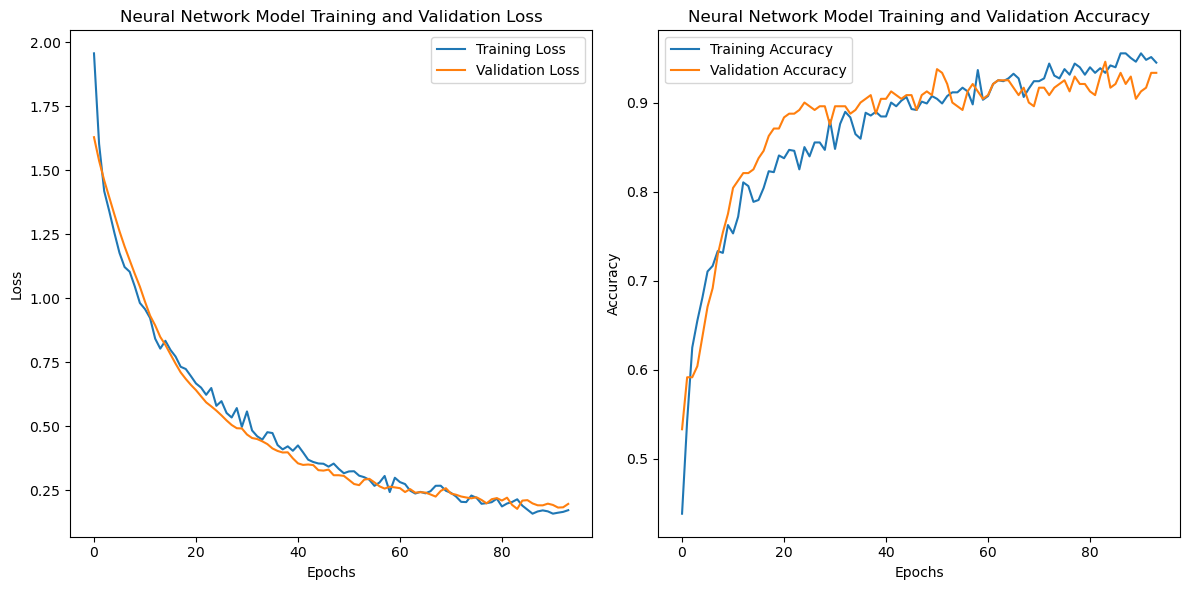

In [13]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Neural Network Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Neural Network Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


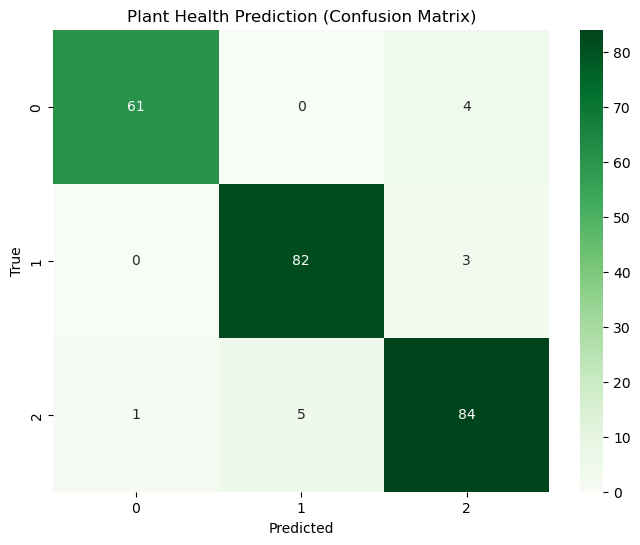

In [15]:
predictions = model.predict(predictors_test)
predictions = np.argmax(predictions, axis = 1)

cm = confusion_matrix(targets_test, predictions)

plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Greens", xticklabels = encoder.classes_, yticklabels = encoder.classes_)
plt.title('Plant Health Prediction (Confusion Matrix)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [17]:
# Save the model in HDF5 format
model.save("plant_health_model.h5")

# OR: Save the model in TensorFlow SavedModel format (folder)
# model.save("plant_health_model")
